In [213]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [215]:
Exercise=sns.load_dataset("exercise")
Exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [216]:
Exercise.drop(["Unnamed: 0","id"],axis=1,inplace=True)

In [217]:
Exercise.isna().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

In [218]:
Exercise.nunique()

diet      2
pulse    39
time      3
kind      3
dtype: int64

In [219]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
Exercise['kind']=le.fit_transform(Exercise['kind'])
Exercise['diet']=le.fit_transform(Exercise['diet'])

In [220]:
Exercise.head()

,diet,pulse,time,kind
0,0,85,1 min,0
1,0,85,15 min,0
2,0,88,30 min,0
3,0,90,1 min,0
4,0,92,15 min,0


In [221]:
Exercise.tail()

,diet,pulse,time,kind
85,1,135,15 min,1
86,1,130,30 min,1
87,1,99,1 min,1
88,1,111,15 min,1
89,1,150,30 min,1


In [222]:
print(f"kind:\n{Exercise['kind'].unique()}")
print(f"time:\n{Exercise['time'].unique()}")
print(f"diet:\n{Exercise['diet'].unique()}")

kind:
[0 2 1]
time:
['1 min', '15 min', '30 min']
Categories (3, object): ['1 min', '15 min', '30 min']
diet:
[0 1]


In [223]:
Exercise['time_int']=(Exercise['time'].str.replace('min', '',regex=False).astype(int))

In [224]:
Exercise.tail()

,diet,pulse,time,kind,time_int
85,1,135,15 min,1,15
86,1,130,30 min,1,30
87,1,99,1 min,1,1
88,1,111,15 min,1,15
89,1,150,30 min,1,30


In [225]:
Exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   diet      90 non-null     int64   
 1   pulse     90 non-null     int64   
 2   time      90 non-null     category
 3   kind      90 non-null     int64   
 4   time_int  90 non-null     int64   
dtypes: category(1), int64(4)
memory usage: 3.2 KB


In [226]:
Exercise.dtypes

diet           int64
pulse          int64
time        category
kind           int64
time_int       int64
dtype: object

In [227]:
Exercise.describe()

,diet,pulse,kind,time_int
count,90.000000,90.000000,90.000000,90.000000
mean,0.500000,99.700000,1.000000,15.333333
std,0.502801,14.858471,0.821071,11.907886
min,0.000000,80.000000,0.000000,1.000000
25%,0.000000,90.250000,0.000000,1.000000
50%,0.500000,96.000000,1.000000,15.000000
75%,1.000000,103.000000,2.000000,30.000000
max,1.000000,150.000000,2.000000,30.000000


In [228]:
x=Exercise.drop(['time','diet'],axis=1)
x

,pulse,kind,time_int
0,85,0,1
1,85,0,15
2,88,0,30
3,90,0,1
4,92,0,15
...,...,...,...
85,135,1,15
86,130,1,30
87,99,1,1
88,111,1,15


In [229]:
y=Exercise['diet']
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: diet, Length: 90, dtype: int64

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [231]:
x_train.shape

(67, 3)

In [232]:
model=DecisionTreeClassifier(
    criterion='gini',max_depth=5,random_state=42
)



In [233]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [234]:
y_train_pred=model.predict(x_train)

In [235]:
y_train_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0])

In [236]:
accuracy_score(y_train,y_train_pred)

0.7313432835820896

In [237]:
y_test_pred=model.predict(x_test)
accuracy_score(y_test,y_test_pred)


0.5652173913043478

[Text(0.6776315789473685, 0.9166666666666666, 'x[0] <= 122.0\ngini = 0.5\nsamples = 67\nvalue = [33, 34]'),
 Text(0.4605263157894737, 0.75, 'x[0] <= 104.5\ngini = 0.495\nsamples = 58\nvalue = [32, 26]'),
 Text(0.569078947368421, 0.8333333333333333, 'True  '),
 Text(0.2894736842105263, 0.5833333333333334, 'x[0] <= 93.5\ngini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(0.15789473684210525, 0.4166666666666667, 'x[0] <= 92.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(0.10526315789473684, 0.25, 'x[0] <= 86.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.42105263157894735, 0.4166666666666667, 'x[0] <= 96.5\ngini = 0.488\nsamples = 26\nvalue = [11.0, 15.0]'),
 Text(0.3157894736842105, 0.25, 'x[1] <= 0.5\ng

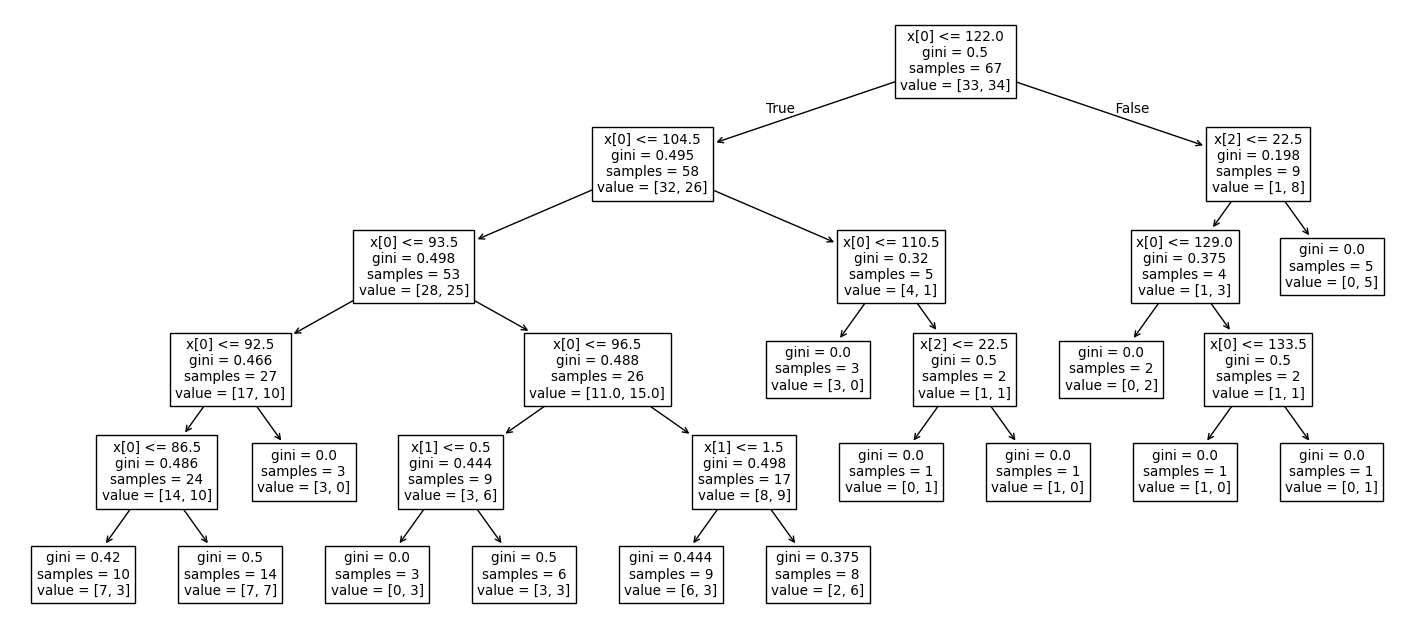

In [238]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model)

In [239]:
model.get_depth()

5

In [240]:
model.get_n_leaves()

np.int64(14)

In [241]:
model_1=DecisionTreeClassifier(max_depth=5)

In [242]:
model_1.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [243]:
y_train_pred=model_1.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.7313432835820896

In [244]:
y_test_pred=model_1.predict(x_test)
accuracy_score(y_test,y_test_pred)

0.5217391304347826

[Text(0.6776315789473685, 0.9166666666666666, 'x[0] <= 122.0\ngini = 0.5\nsamples = 67\nvalue = [33, 34]'),
 Text(0.4605263157894737, 0.75, 'x[0] <= 104.5\ngini = 0.495\nsamples = 58\nvalue = [32, 26]'),
 Text(0.569078947368421, 0.8333333333333333, 'True  '),
 Text(0.2894736842105263, 0.5833333333333334, 'x[0] <= 93.5\ngini = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(0.15789473684210525, 0.4166666666666667, 'x[0] <= 92.5\ngini = 0.466\nsamples = 27\nvalue = [17, 10]'),
 Text(0.10526315789473684, 0.25, 'x[0] <= 86.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]'),
 Text(0.05263157894736842, 0.08333333333333333, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.15789473684210525, 0.08333333333333333, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.21052631578947367, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.42105263157894735, 0.4166666666666667, 'x[0] <= 96.5\ngini = 0.488\nsamples = 26\nvalue = [11.0, 15.0]'),
 Text(0.3157894736842105, 0.25, 'x[1] <= 0.5\ng

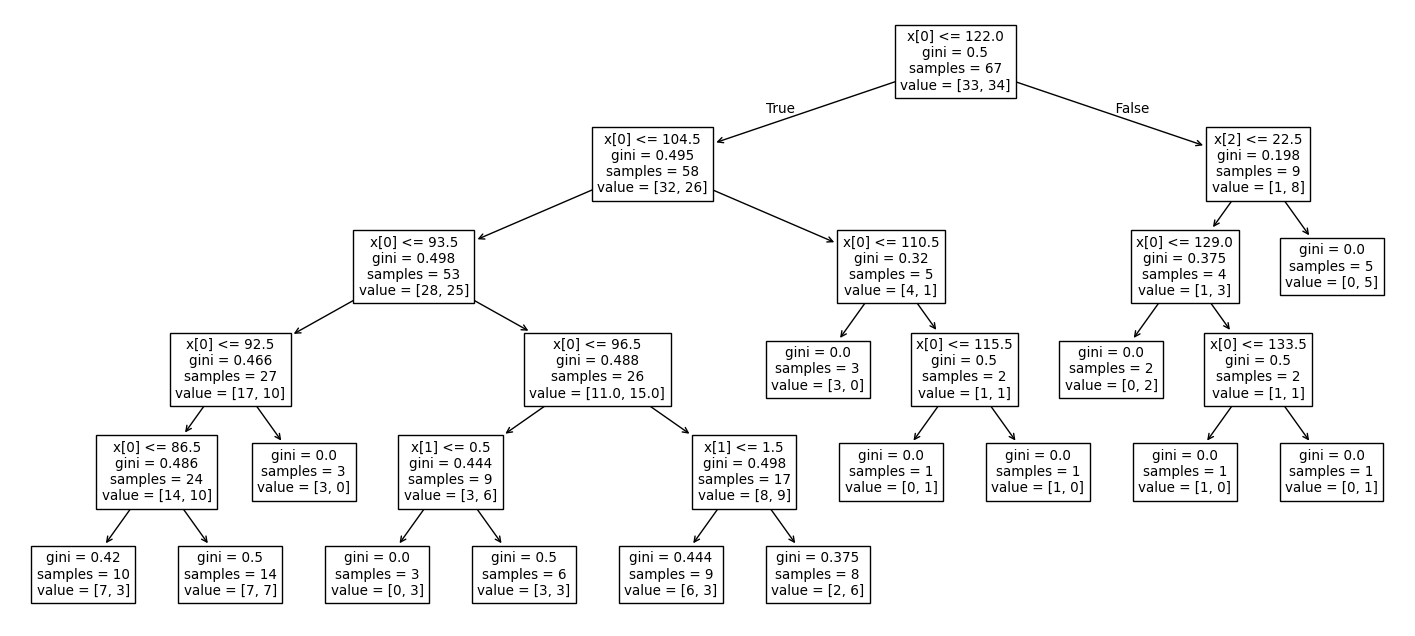

In [245]:
plt.figure(figsize=(18,8))
plot_tree(decision_tree=model_1)

In [246]:
X=Exercise.drop(['time','pulse'],axis=1)
X

,diet,kind,time_int
0,0,0,1
1,0,0,15
2,0,0,30
3,0,0,1
4,0,0,15
...,...,...,...
85,1,1,15
86,1,1,30
87,1,1,1
88,1,1,15


In [247]:
Y=Exercise["pulse"]
Y

0      85
1      85
2      88
3      90
4      92
     ... 
85    135
86    130
87     99
88    111
89    150
Name: pulse, Length: 90, dtype: int64

In [248]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [249]:
X_train.shape

(72, 3)

In [250]:
model_reg=DecisionTreeRegressor()

In [251]:
model_reg.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [252]:
Y_train_pred=model_reg.predict(X_train)

In [253]:
Y_train_pred

array([ 97.        ,  98.75      , 138.25      ,  89.8       ,
       111.75      , 109.8       ,  93.33333333,  93.33333333,
        91.8       , 124.        , 111.75      ,  99.66666667,
        97.        ,  92.33333333, 109.8       ,  89.6       ,
        92.33333333,  91.8       ,  98.75      , 109.8       ,
        93.33333333,  94.25      ,  91.8       ,  95.6       ,
        96.6       ,  99.66666667,  94.25      ,  95.6       ,
        95.6       , 124.        ,  95.6       , 138.25      ,
       124.        ,  95.6       ,  97.        ,  96.6       ,
       138.25      , 138.25      , 109.8       ,  97.        ,
        89.5       ,  89.8       ,  94.25      , 111.75      ,
        94.25      ,  83.        , 124.        ,  96.6       ,
        89.5       ,  96.6       ,  89.6       ,  92.33333333,
        89.6       ,  89.5       , 109.8       ,  89.6       ,
        91.8       ,  99.66666667,  96.6       ,  98.75      ,
        98.75      ,  89.8       ,  94.25      , 111.75

In [254]:
Y_test_pred=model_reg.predict(X_test)

In [255]:
print("MAE :",mean_absolute_error(Y_test,Y_test_pred))
print("MSE :",mean_squared_error(Y_test,Y_test_pred))
print("RMSE :",np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
print("R2 :",r2_score(Y_test,Y_test_pred))

MAE : 6.208333333333333
MSE : 64.10532407407408
RMSE : 8.006580048564684
R2 : 0.7416040482203505


In [256]:
print("MAE :",mean_absolute_error(Y_train,Y_train_pred))
print("MSE :",mean_squared_error(Y_train,Y_train_pred))
print("RMSE :",np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
print("R2 :",r2_score(Y_train,Y_train_pred))

MAE : 5.153703703703704
MSE : 42.704861111111114
RMSE : 6.53489564653569
R2 : 0.7972038605850971


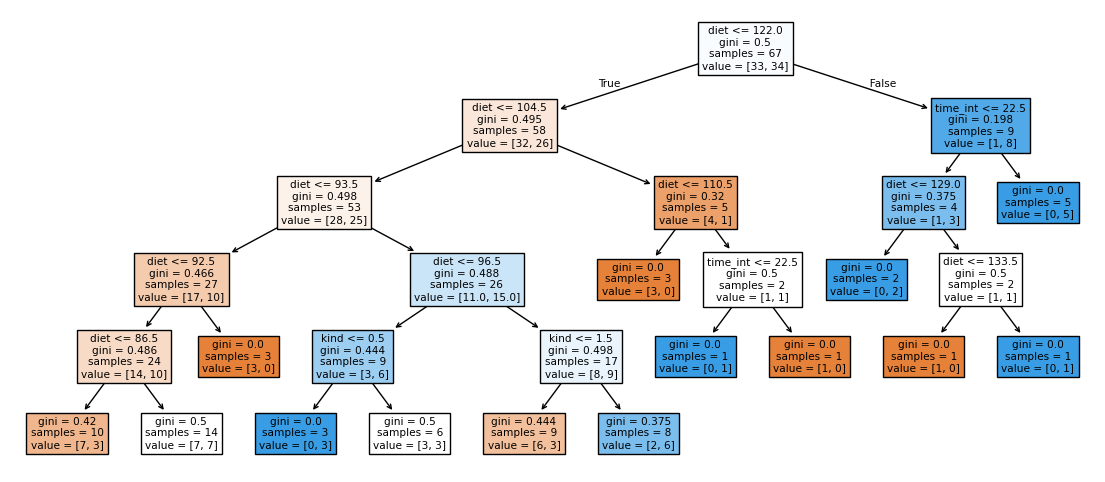

In [257]:
plt.figure(figsize=(14,6))
plot_tree(model,feature_names=['diet','kind','time_int'],
          filled=True)
plt.show()

In [258]:
model_reg.get_depth()

5